    # Orris J. Disney II
    # Python/SQL project Spring 2019
    
    
    # Project for Python - Population and Police on force vs number of violent crimes per year
    

In [1]:
import sqlite3
import csv
import matplotlib.pyplot as plt
import pandas as pd 

# this is the query to run to create the table for the peace officers table in sqlite

# this is also where the database name will be

peace_officer_create_query = '''
CREATE TABLE IF NOT EXISTS peace_officers (
                                    id integer PRIMARY KEY,
                                    year integer NOT NULL,
                                    Number_URC_fulltime integer NOT NULL,
                                    number_URC_sworn integer NOT NULL,
                                    number_URC_non_sworn integer NOT NULL
                                );

'''

# this is the query to run to create the table for the population, violent crime count, and broken down other 
# information if i have time to create tables for it in sqlite

crime_data_create_query = '''
CREATE TABLE IF NOT EXISTS crime_data (
                                    id integer PRIMARY KEY,
                                    year integer NOT NULL,
                                    population integer NOT NULL,
                                    violent_crime integer NOT NULL,
                                    murder integer NOT NULL,
                                    robbery integer NOT NULL,
                                    aggravated_assault integer NOT NULL,
                                    property_crime integer NOT NULL,
                                    burglary integer NOT NULL,
                                    larceny_theft integer NOT NULL,
                                    motor_vehicle_theft integer NOT NULL
                                );

'''

database_name = "violentcrimes.db"

In [2]:
def printoutlisttable():
    
    res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    for name in res:
        print(name[0])


In [3]:
# this will create the database if it does not exist, and set connection if the database already exist

conn = sqlite3.connect(database_name) 
print("Open/Created db successfully")


Open/Created db successfully


In [4]:
# printout if there are any tables in the database  --  should be empty, but this is used for visual verification

print('Before removing the peace_officer and crime_data table')
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])


Before removing the peace_officer and crime_data table
peace_officers
crime_data


In [5]:
# make sure we are starting with a clean empty database before importing data from CSV files

# Once we have a Connection object, we can then create a Cursor object. 
# Cursors allow us to execute SQL queries against a database:

c = conn.cursor()

c.execute('''DROP TABLE IF EXISTS[peace_officers]''') 
c.execute('''DROP TABLE IF EXISTS[crime_data]''') 

print('After removing the peace_officer and crime_data table')
printoutlisttable()


After removing the peace_officer and crime_data table


In [6]:
# Create the two tables to get ready to get data from CSV files

c.execute(peace_officer_create_query)
c.execute(crime_data_create_query)


In [7]:
# printout to confirm the peace officer and crime data table are created

print('After creating the peace_officer and crime_data table')
printoutlisttable()

After creating the peace_officer and crime_data table
peace_officers
crime_data


In [8]:
#  input the data from peace officer to the table in the database

with open('number_of_peace_officers_table.csv', 'r') as csvfile: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(csvfile) # comma is default delimiter
    to_db = [(i['year'], i['Number_URC_fulltime'], i['number_URC_sworn'], i['number_URC_non_sworn']) for i in dr]

c.executemany("INSERT INTO peace_officers (year, Number_URC_fulltime, number_URC_sworn, number_URC_non_sworn) VALUES (?, ?, ?, ?);", to_db)
conn.commit()
conn.close()

In [9]:
#  input the data from population and violent crimes into the table

conn = sqlite3.connect("violentcrimes.db") 
c = conn.cursor()
with open('Population_and_violent_crime_97_2016.csv', 'r') as csvCrimeDatafile: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    drCrimeData = csv.DictReader(csvCrimeDatafile) # comma is default delimiter
    to_dbCrimeData = [(i['year'], i['population'], i['violent_crime'], i['murder'], i['robbery'], i['aggravated_assault'], i['property_crime'], i['burglary'], i['larceny_theft'], i['motor_vehicle_theft']) for i in drCrimeData]

c.executemany("INSERT INTO crime_data (year, population, violent_crime, murder, robbery, aggravated_assault, property_crime, burglary, larceny_theft, motor_vehicle_theft) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_dbCrimeData)
conn.commit()
conn.close()

In [10]:
#  Confirm that the data went to the peace_officer table

conn = sqlite3.connect(database_name) 

res = conn.execute("SELECT * FROM peace_officers;")
for name in res:
    print(str(name[0]) + ' ' + str(name[1]) + ' ' + str(name[2]) + ' ' + str(name[3]) + ' ' + str(name[4]))
    
conn.close()


1 1992 779914 569703 210211
2 1993 799373 579488 219885
3 1994 838109 603099 235010
4 1995 873356 629762 243594
5 1996 892262 640492 251770
6 1997 890389 642753 247636
7 1998 930310 666492 263818
8 1999 962122 680934 281188
9 2000 975511 690195 285316
10 2001 1003441 705559 297882
11 2002 1011967 705871 306096
12 2003 1017718 712371 305347
13 2004 1039931 725334 314597
14 2005 1044228 727084 317144
15 2006 1066024 740592 325432
16 2007 1095989 751526 344463
17 2008 1099463 762944 336519
18 2009 1102599 764635 337964
19 2010 1089054 758854 330200
20 2011 1098778 768287 330491
21 2012 1076054 750340 325714


In [11]:
#  Confirm that the data went to the crime_table table

conn = sqlite3.connect(database_name) 

res = conn.execute("SELECT * FROM crime_data;")
for name in res:
    print(str(name[0]) + ' ' + str(name[1]) + ' ' + str(name[2]) + ' ' + str(name[3]) + ' ' + str(name[4]) + ' ' + str(name[5]) + ' ' + str(name[6]) + ' ' + str(name[7]) + ' ' + str(name[8]))

conn.close()


1 1997 267783607 1636096 18208 498534 1023201 11558475 2460526
2 1998 270248003 1533887 16974 447186 976583 10951827 2332735
3 1999 272690813 1426044 15522 409371 911740 10208334 2100739
4 2000 281421906 1425486 15586 408016 911706 10182584 2050992
5 2001 285317559 1439480 16037 423557 909023 10437189 2116531
6 2002 287973924 1423677 16229 420806 891407 10455277 2151252
7 2003 290788976 1383676 16528 414235 859030 10442862 2154834
8 2004 293656842 1360088 16148 401470 847381 10319386 2144446
9 2005 296507061 1390745 16740 417438 862220 10174754 2155448
10 2006 299398484 1435123 17309 449246 874096 10019601 2194993
11 2007 301621157 1422970 17128 447324 866358 9882212 2190198
12 2008 304059724 1394461 16465 443563 843683 9774152 2228887
13 2009 307006550 1325896 15399 408742 812514 9337060 2203313
14 2010 309330219 1251248 14722 369089 781844 9112625 2168459
15 2011 311587816 1206005 14661 354746 752423 9052743 2185140
16 2012 313873685 1217057 14856 355051 762009 9001992 2109932
17 201

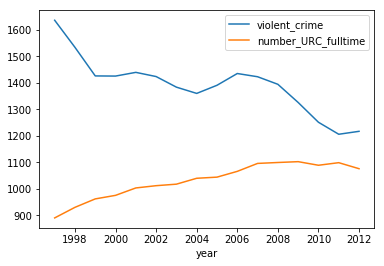

In [12]:
# this is the first attempt to graph the data between the violent crimes and number of police officers via URC data

conn = sqlite3.connect(database_name) 
#res_police_population_crime = conn.execute("SELECT cd.year, cd.population, cd.violent_crime, po.number_URC_fulltime FROM crime_data as cd JOIN peace_officers as po ON cd.year = po.year;")

actual_data = pd.read_sql_query("SELECT cd.year as year, cd.population as population, cd.violent_crime as violent_crime, po.number_URC_fulltime as number_URC_fulltime FROM crime_data as cd JOIN peace_officers as po ON cd.year = po.year;", conn)

conn.close()

actual_data["year"] = pd.to_numeric(actual_data['year'])

actual_data["violent_crime"] = pd.to_numeric(actual_data['violent_crime']/1000)
actual_data["number_URC_fulltime"] = pd.to_numeric(actual_data['number_URC_fulltime']/1000)
actual_data.plot(x="year", y=["violent_crime", "number_URC_fulltime"], kind="line")

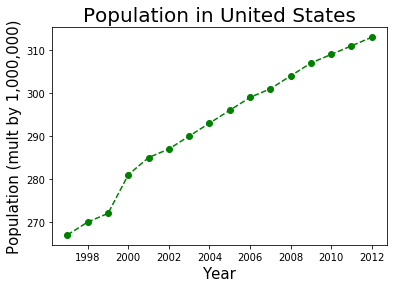

In [33]:
conn = sqlite3.connect(database_name) 

c = conn.cursor()

c.execute('SELECT cd.year as year, cd.population/1000000 as population, cd.violent_crime as violent_crime, po.number_URC_fulltime as number_URC_fulltime FROM crime_data as cd JOIN peace_officers as po ON cd.year = po.year')
data = c.fetchall()

year = []
population = []
    
for row in data:
    year.append((row[0]))
    population.append(row[1])

# refer to this website for the plot information 
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
plt.ylabel("Population (mult by 1,000,000)", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.plot(year,population,'go--')
plt.title("Population in United States",fontsize= 20)


plt.show()

In [14]:
conn = sqlite3.connect(database_name)
df = pd.read_sql_query("SELECT cd.year as year, cd.population as population, cd.violent_crime as violent_crime, po.number_URC_fulltime as number_URC_fulltime FROM crime_data as cd JOIN peace_officers as po ON cd.year = po.year;", conn)
df

,year,population,violent_crime,number_URC_fulltime
0,1997,267783607,1636096,890389
1,1998,270248003,1533887,930310
2,1999,272690813,1426044,962122
3,2000,281421906,1425486,975511
4,2001,285317559,1439480,1003441
5,2002,287973924,1423677,1011967
6,2003,290788976,1383676,1017718
7,2004,293656842,1360088,1039931
8,2005,296507061,1390745,1044228
9,2006,299398484,1435123,1066024


In [15]:
df["violent_crime"]
conn.close()

In [16]:
# Used Dataframe for this chart.

conn = sqlite3.connect(database_name)
c = conn.cursor()
c.execute('SELECT cd.year as year, cd.population as population, cd.violent_crime as violent_crime, po.number_URC_fulltime as number_URC_fulltime FROM crime_data as cd JOIN peace_officers as po ON cd.year = po.year ORDER BY cd.year' )
rows = c.fetchall()
df = pd.DataFrame( [[ij for ij in i] for i in rows] )
df.rename(columns={0: 'Year', 1: 'population', 2: 'Violent Crime', 3: 'Police Officers'}, inplace=True);
df

,Year,population,Violent Crime,Police Officers
0,1997,267783607,1636096,890389
1,1998,270248003,1533887,930310
2,1999,272690813,1426044,962122
3,2000,281421906,1425486,975511
4,2001,285317559,1439480,1003441
5,2002,287973924,1423677,1011967
6,2003,290788976,1383676,1017718
7,2004,293656842,1360088,1039931
8,2005,296507061,1390745,1044228
9,2006,299398484,1435123,1066024


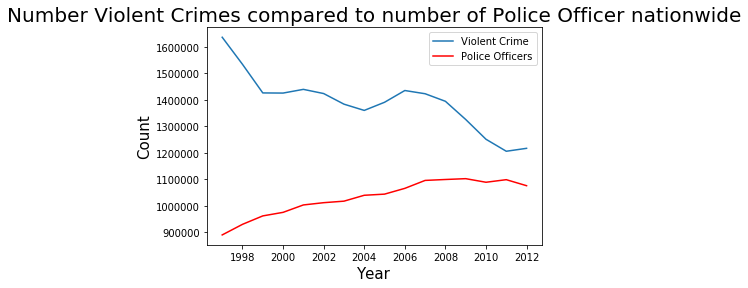

In [35]:
# this is where I compare the number of violent crimes and number of police officers a different way.

# gca stands for 'get current axis'.   this is used so I can put two lines of data on one graph

ax = plt.gca()
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Count", fontsize=15)


df.plot(kind='line',x='Year',y='Violent Crime',ax=ax)
df.plot(kind='line',x='Year',y='Police Officers', color='red', ax=ax)
plt.title("Number Violent Crimes compared to number of Police Officer nationwide", fontsize = 20)


plt.show()